In [1]:
import datetime
import os
from mdcrow import MDCrow

In [2]:
prompt25 = "Simulate 1L6X at pH 5.0 and 8.8, then analyze the SASA and RMSF under both pH conditions."
llm_var = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"
agent = MDCrow(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-07
time: 18:54:08
LLM:  accounts/fireworks/models/llama-v3p1-405b-instruct 
Temperature:  0.1


In [3]:
agent.run(prompt25)

Thought: First, I need to download the PDB file for 1L6X and then set up and run simulations at pH 5.0 and 8.8. After the simulations are complete, I can analyze the Solvent Accessible Surface Area (SASA) and Root Mean Square Fluctuation (RMSF) for both pH conditions.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1L6X"
}
```
PDB file found with this ID: 1L6X
Now that I have the PDB file, I can set up and run simulations at pH 5.0 and 8.8 using the SetUpandRunFunction tool.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1L6X_185412",
        "forcefield_files": ["amber99sbildn.xml", "tip3p.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "NoCutoff",
            "constraints": "None",
            "rigidWater": false
        },
        "integrator_params": {
            "integrator_type": "LangevinMiddle",
            "Temperature": "300 * kelvin",
            "Friction": "1.0 / pi

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

registry = agent.path_registry
print('ckpt_dir:',os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-09-07
time: 18:56:23
ckpt_dir: ckpt_110
Files found in registry: 1L6X_185412: PDB file downloaded from RSCB
 PDBFile ID: 1L6X_185412
 1L6X_185420: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 5.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_185423: Initial positions for simulation sim0_185423
 sim0_185423: Basic Simulation of Protein 1L6X_185420
 rec0_185424: Simulation trajectory for protein 1L6X_185420 and simulation sim0_185423
 rec1_185424: Simulation state log for protein 1L6X_185420 and simulation sim0_185423
 rec2_185424: Simulation pdb frames for protein 1L6X_185420 and simulation sim0_185423
 sasa_sim0_185423: Total SASA values for sim0_185423
 fig0_185504: Plot of SASA over time for sim0_185423
 rmsf_1L6X: RMSF for 1L6X
 fig0_185507: RMSF plot for 1L6X
 1L6X_185510: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 

In [5]:
import re
import os

matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_id2 = matches[1]
fig_id3 = matches[2]
fig_id4 = matches[3]
fig_path_1 = registry.get_mapped_path(fig_id1)
fig_path_2 = registry.get_mapped_path(fig_id2)
fig_path_3 = registry.get_mapped_path(fig_id3)
fig_path_4 = registry.get_mapped_path(fig_id4)

assert os.path.exists(fig_path_1)
assert os.path.exists(fig_path_2)
assert os.path.exists(fig_path_3)
assert os.path.exists(fig_path_4)
print(f'It is asserted that file paths for {fig_id1}, {fig_id2}, {fig_id3} and {fig_id4} exist')

It is asserted that file paths for fig0_185504, fig0_185507, fig0_185617 and fig0_185620 exist


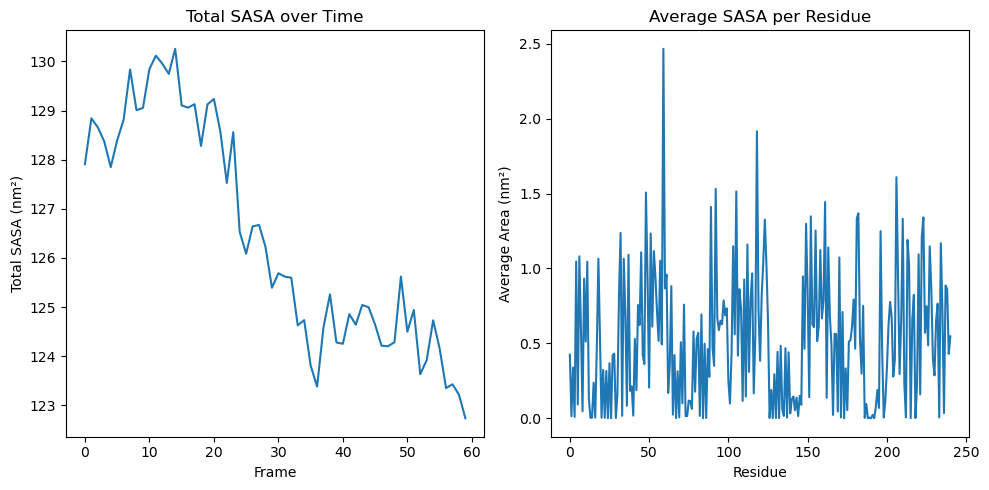

In [6]:
from IPython.display import Image
Image(filename=fig_path_1)

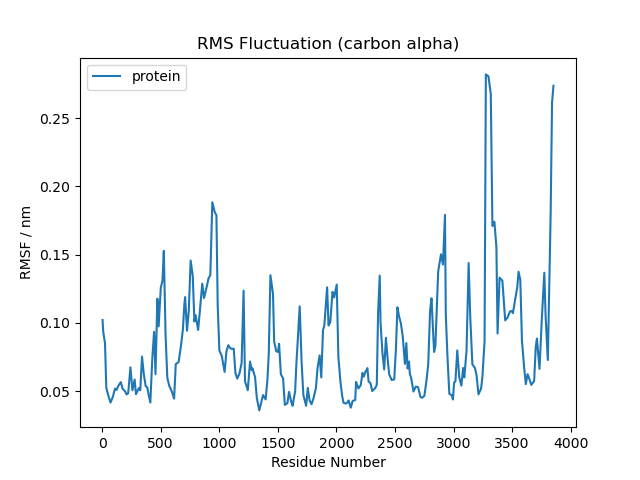

In [7]:
Image(filename=fig_path_2)

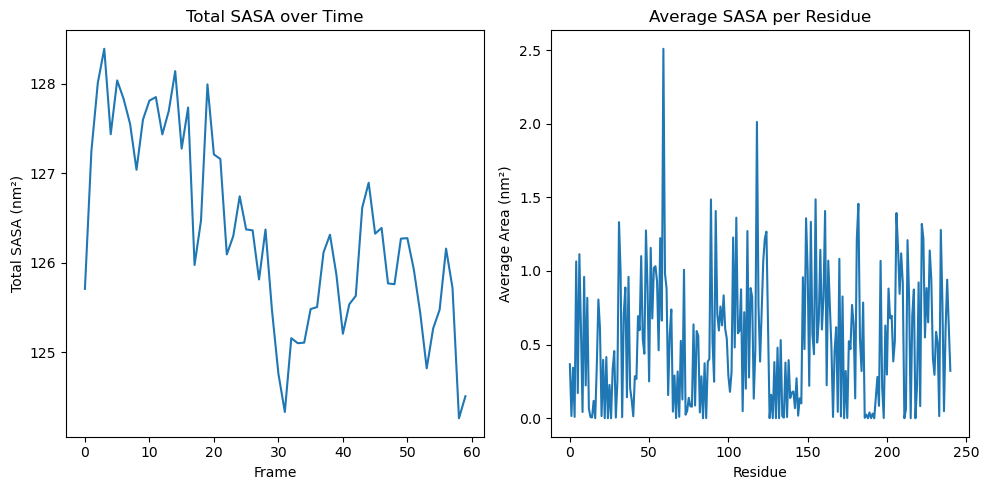

In [8]:
Image(filename=fig_path_3)

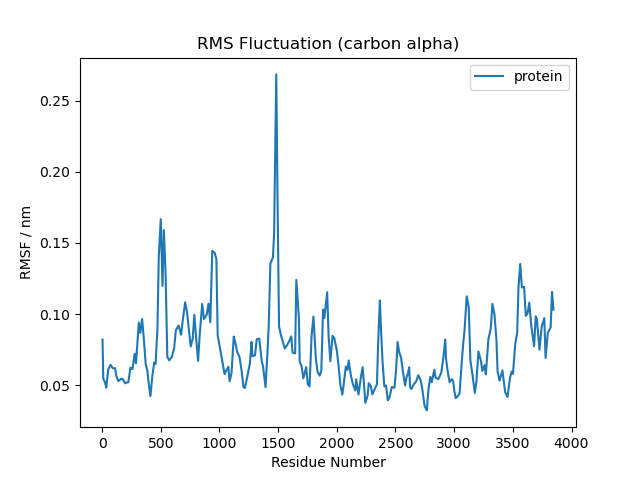

In [9]:
Image(filename=fig_path_4)

# Experiment Result: ✅❌

1. Completed without Exception or TimeOut Errors  ✅
2. Attempted all necessary steps  ✅
3. Completed without Hallucination  ✅
4. Logic make sense  ✅
5. Correct Answer  ✅